In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 모델 생성, 하이퍼파라미터 튜닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#평가지표
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 파라미터 튜닝

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,stratify=data.target,random_state=66)

- grid search

In [4]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)

print(tree.score(X_test,y_test))

0.8951048951048951


In [5]:
dt = DecisionTreeClassifier(random_state = 0)

param_grid={'criterion' :['gini','entropy'],
                 'max_depth':[4,5,6,8,10],
                 'min_samples_leaf':[3,5,10,50,100]}

gcv=GridSearchCV(dt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gcv.fit(X_train,y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수
print(gcv.score(X_test, y_test))

final params {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}
best score 0.9460093896713615
0.916083916083916


- random search

In [6]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)

print(tree.score(X_test, y_test))

0.8951048951048951


In [7]:
dt = DecisionTreeClassifier(random_state = 0)

param_grid={'criterion' :['gini','entropy'],
                 'max_depth':[4,5,6,8,10],
                 'min_samples_leaf':[3,5,10,50,100]}

rcv = RandomizedSearchCV(dt, param_distributions=param_grid, scoring='accuracy', n_iter=8) #8번 반복
rcv.fit(X_train, y_train)
print('final params', rcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', rcv.best_score_)      # 최고의 점수
print(rcv.score(X_test, y_test))

final params {'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}
best score 0.9436935704514363
0.9370629370629371


In [8]:
print('기존모델 성능 : ', tree.score(X_test,y_test))
print('grid_search 이용해 튜닝한 모델 성능 : ', gcv.score(X_test, y_test))
print('random_search 이용해 튜닝한 모델 성능 : ', rcv.score(X_test, y_test))

기존모델 성능 :  0.8951048951048951
grid_search 이용해 튜닝한 모델 성능 :  0.916083916083916
random_search 이용해 튜닝한 모델 성능 :  0.9370629370629371


# 평가지표

- MSE

In [9]:
result = pd.DataFrame(rcv.predict_proba(X_test))
result1 = result.iloc[:,1]
result1

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.666667
         ...   
138    1.000000
139    1.000000
140    1.000000
141    1.000000
142    1.000000
Name: 1, Length: 143, dtype: float64

In [10]:
mean_squared_error(y_test, result1)

0.06216006216006216

- CROSS-ENTROPY

In [11]:
result = pd.DataFrame(rcv.predict_proba(X_test))

In [12]:
log_loss(y_test,result)

1.7315933238789132

- Confusion-matrix

In [13]:
result2 = pd.DataFrame(rcv.predict(X_test))

In [14]:
confusion_matrix(y_test, result2)

array([[49,  4],
       [ 5, 85]], dtype=int64)

In [15]:
accuracy_score(y_test, result2)

0.9370629370629371

In [16]:
precision_score(y_test, result2)

0.9550561797752809

In [17]:
precision_score(y_test, result2)

0.9550561797752809

In [18]:
recall_score(y_test, result2)

0.9444444444444444

In [19]:
f1_score(y_test, result2)

0.9497206703910613

- roc curve

In [20]:
fpr, tpr, threshold = roc_curve(y_test, result1)

0.9444444444444445

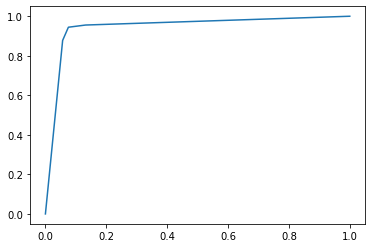

In [21]:
plt.plot(fpr, tpr)
roc_auc_score(y_test, result1)

In [5]:
# 여기서는 매개변수 갱신 방법론으로 일반적 Gradient Descent를 이용했고, 손실함수로 교차엔트로피를 사용했습니다.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# MNIST 데이터
mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

# Set up model
x = tf.placeholder(tf.float32, [None, 784])  # Input data가 들어갈 공간 정의 *None : 해당 값이 어떤 차원이든 될 수 있음을 의미
W = tf.Variable(tf.zeros([784, 10])) # 가중치 매개변수 설정. 784개의 이미지 벡터.
b = tf.Variable(tf.zeros([10])) # bias 설정
y = tf.nn.softmax(tf.matmul(x, W) + b) # softmax 함수 정의. matmul(x,W)는 x와 W를 곱하는 것.

y_ = tf.placeholder(tf.float32, [None, 10]) # 정답이 들어갈 공간 정의
cross_entropy = -tf.reduce_sum(y_*tf.log(y)) # 손실함수인 교차엔트로피 정의. 
# tf.log(y) : y의 각 원소에 대한 로그값
# tf.reduce_sum : 합
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy) 

# 경사하강법 이용하여 손실함수인 교차엔트로피 최소화
# Session
init = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session() # 그래프를 돌릴 수 있는 객체를 만듦
sess.run(init) #

# Learning
for i in range(1000): # 1000번 학습 시작
  batch_xs, batch_ys = mnist.train.next_batch(100) # 100개를 임의 추출
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Validation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

# Result should be approximately 91%.
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'

In [ ]:
# TensorBoard를 활용한 분석
# 코드는 아래와 같습니다.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Dataset loading
mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

# Set up model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

y_ = tf.placeholder(tf.float32, [None, 10])
w_hist = tf.summary.histogram("W", W)
b_hist = tf.summary.histogram("b", b)

cross_entropy = -tf.reduce_sum(y_*tf.log(y))
cross_entropy_scalar = tf.summary.scalar("cross_entropy", cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# Session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_scalar = tf.summary.scalar("accuracy", accuracy)

merged = tf.summary.merge([w_hist, b_hist, cross_entropy_scalar, accuracy_scalar])
writer = tf.summary.FileWriter("./logs", sess.graph)

# Learning
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  summary,_ = sess.run([merged, train_step], feed_dict={x: batch_xs, y_: batch_ys})
  writer.add_summary(summary, i)

# Validation
# Result should be approximately 91%.
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# 주피터를 사용해 위의 코드를 수행하면 주피터 작업 디렉터리에 logs라는 폴더가 생기게 됩니다.

# 그리고 anaconda prompt 창에 아래와 같이 입력하면 TensorBoard를 이용할 수 있는 주소를 얻을 수 있습니다.
tensorboard --logdir=./주피터작업디렉터리/logs